In [2]:
import pandas as pd
data = pd.read_csv('pine_soil_slope_ndvi.csv')


In [3]:
len(data)

177162

In [4]:
from sklearn.model_selection import train_test_split
# Perform stratified split
train_data, test_data = train_test_split(data, test_size=0.3, stratify=data["Specie"], random_state=42)

# Print distributions to verify
print("Train distribution:\n", train_data["Specie"].value_counts(normalize=True))
print("\nTest distribution:\n", test_data["Specie"].value_counts(normalize=True))

Train distribution:
 Specie
PPAT         0.180562
PGRN         0.174611
PMAX         0.165225
PTEH         0.122616
PGRS         0.104602
PTEL         0.084660
PCAR         0.076677
POOC         0.051366
PTAE         0.018684
PPATxPTEH    0.003242
PELL         0.003000
PELLxPCAR    0.002903
PPATxPOOC    0.002451
PPATxPGRS    0.002411
PPATxPTEL    0.002177
PPATxPELL    0.002032
PCARxPTEL    0.001419
PCARxPOOC    0.001363
Name: proportion, dtype: float64

Test distribution:
 Specie
PPAT         0.180549
PGRN         0.174603
PMAX         0.165234
PTEH         0.122618
PGRS         0.104612
PTEL         0.084649
PCAR         0.076690
POOC         0.051365
PTAE         0.018683
PPATxPTEH    0.003255
PELL         0.002992
PELLxPCAR    0.002898
PPATxPOOC    0.002465
PPATxPGRS    0.002408
PPATxPTEL    0.002183
PPATxPELL    0.002032
PCARxPTEL    0.001411
PCARxPOOC    0.001355
Name: proportion, dtype: float64


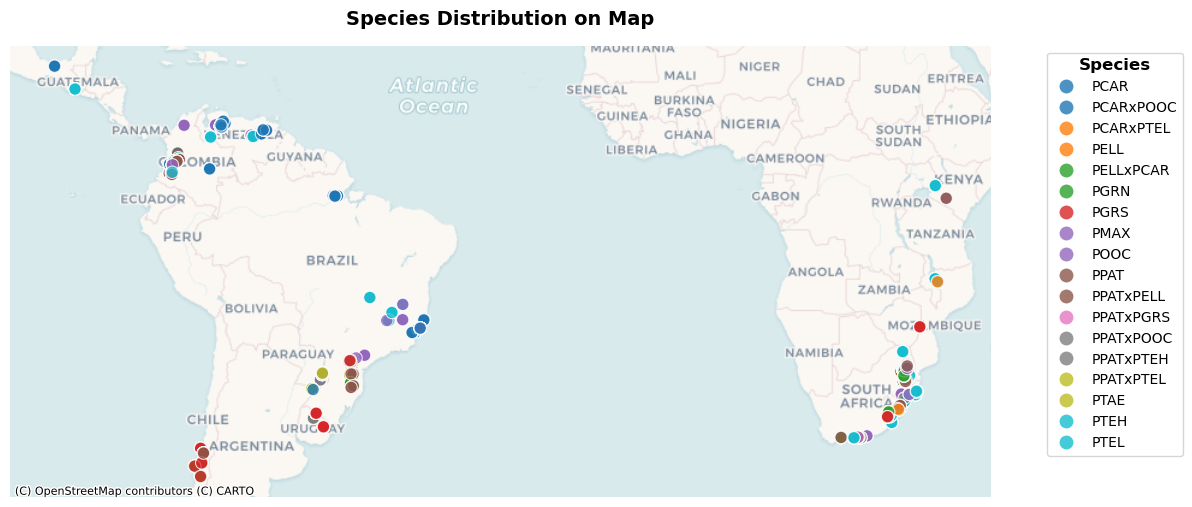

In [6]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(train_data, geometry=gpd.points_from_xy(train_data["longitude"], train_data["latitude"]), crs="EPSG:4326")

# Convert to Web Mercator projection for basemap
gdf = gdf.to_crs(epsg=3857)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

# Plot species distribution
sc = gdf.plot(ax=ax, column="Specie", cmap="tab10", legend=True, markersize=80, alpha=0.8, edgecolor="white", linewidth=0.8)

# Add basemap (use a soft-toned CartoDB map)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, alpha=0.9)

# Customize legend and move it outside the plot
leg = ax.get_legend()
if leg:
    leg.set_title("Species", prop={"size": 12, "weight": "bold"})
    for text in leg.get_texts():
        text.set_fontsize(10)
    leg.set_bbox_to_anchor((1.05, 1))  # Moves legend outside the plot

# Remove axes labels for a clean map
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Add title
plt.title("Species Distribution on Map", fontsize=14, fontweight="bold", pad=15)

# Adjust layout to fit everything
plt.tight_layout()
plt.show()


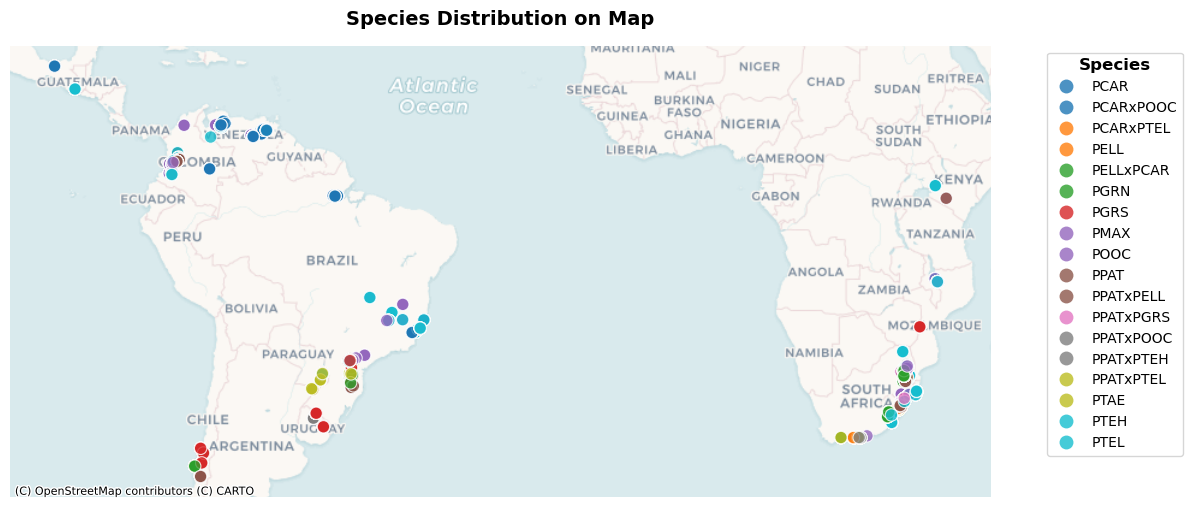

In [7]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(test_data, geometry=gpd.points_from_xy(test_data["longitude"], test_data["latitude"]), crs="EPSG:4326")

# Convert to Web Mercator projection for basemap
gdf = gdf.to_crs(epsg=3857)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

# Plot species distribution
sc = gdf.plot(ax=ax, column="Specie", cmap="tab10", legend=True, markersize=80, alpha=0.8, edgecolor="white", linewidth=0.8)

# Add basemap (use a soft-toned CartoDB map)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, alpha=0.9)

# Customize legend and move it outside the plot
leg = ax.get_legend()
if leg:
    leg.set_title("Species", prop={"size": 12, "weight": "bold"})
    for text in leg.get_texts():
        text.set_fontsize(10)
    leg.set_bbox_to_anchor((1.05, 1))  # Moves legend outside the plot

# Remove axes labels for a clean map
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Add title
plt.title("Species Distribution on Map", fontsize=14, fontweight="bold", pad=15)

# Adjust layout to fit everything
plt.tight_layout()
plt.show()


In [8]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')